# Module 2- Plotting in Financial Markets


   ### Welcome to the Answer notebook for Module 2 ! 
Make sure that you've submitted the module 1 notebook and unlocked Module 2 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 2.1 
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

>Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

>This would be helpful if we are to train our model to take NLP inputs.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../Module 1/week2.csv")

In [3]:
print(data.shape)
data['Date'] = pd.to_datetime(data['Date'])
data.info()
data['Day_Perc_Change'].fillna(0)
print(type(data))

(495, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 21 columns):
Unnamed: 0                495 non-null int64
Series                    495 non-null object
Symbol                    495 non-null object
Date                      495 non-null datetime64[ns]
Prev Close                495 non-null float64
Open Price                495 non-null float64
High Price                495 non-null float64
Low Price                 495 non-null float64
Last Price                495 non-null float64
Close Price               495 non-null float64
Average Price             495 non-null float64
Total Traded Quantity     495 non-null int64
Turnover                  495 non-null float64
No. of Trades             495 non-null int64
Deliverable Qty           495 non-null int64
% Dly Qt to Traded Qty    495 non-null float64
Month                     495 non-null int64
Year                      495 non-null int64
Total_Cost                495 non-null float64

In [4]:
data.set_index('Date',inplace=True)
data.head()

,Unnamed: 0,Series,Symbol,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Total_Cost,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,0,EQ,HDFCBANK,1551.65,1550.0,1557.2,1542.25,1553.00,1553.40,1550.73,701195,1.087368e+09,15104,309282,44.11,5,2017,1.089236e+09,NaN,Slight or No change
2017-05-16,1,EQ,HDFCBANK,1553.40,1555.0,1562.0,1548.25,1561.85,1559.65,1555.11,897594,1.395857e+09,21073,347734,38.74,5,2017,1.399932e+09,0.004023,Slight or No change
2017-05-17,2,EQ,HDFCBANK,1559.65,1558.8,1565.4,1551.50,1557.50,1557.15,1557.51,868118,1.352103e+09,32732,367931,42.38,5,2017,1.351790e+09,-0.001603,Slight or No change
2017-05-18,3,EQ,HDFCBANK,1557.15,1549.0,1561.5,1548.10,1557.50,1557.10,1556.99,776820,1.209500e+09,13648,518101,66.70,5,2017,1.209586e+09,-0.000032,Slight or No change
2017-05-19,4,EQ,HDFCBANK,1557.10,1559.5,1569.9,1545.25,1568.05,1561.25,1556.93,713534,1.110926e+09,18458,296680,41.58,5,2017,1.114005e+09,0.002665,Slight or No change


/home/abhishek/.local/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


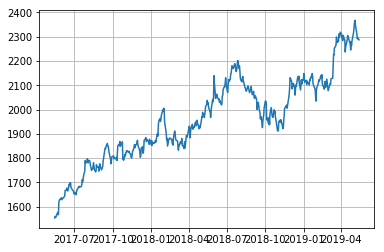

In [5]:
plt.plot(data.index,data['Close Price'])
plt.savefig('the_best_plot.pdf')
plt.autoscale()
plt.grid()
#plt.margins(0.0000001)
plt.show()

In [6]:
data['Day_Perc_Change'] = 100* data['Day_Perc_Change']

# Query 2.2

A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function. 

Display a stem plot of the daily change in of the stock price in percentage.

This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

/home/abhishek/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'cmap'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


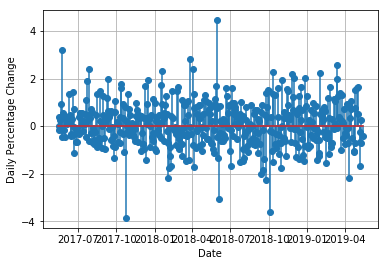

In [7]:
plt.stem(data.index,data['Day_Perc_Change'],cmap = plt.cm.Accent)
plt.xlabel('Date')
plt.grid()
plt.ylabel('Daily Percentage Change')
plt.show()

# Query 2.3

Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

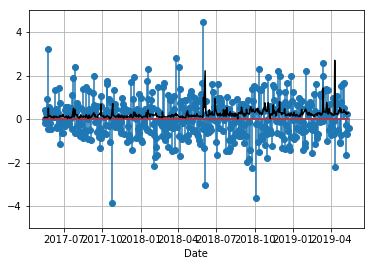

In [8]:
plt.stem(data.index,data['Day_Perc_Change'])
plt.plot(data.index,data['Total Traded Quantity']/10000000,c='black')
plt.ylim(-5,5)
plt.grid()
plt.xlabel('Date')
plt.show()

# Query 2.4

We had created a Trend column in module 1.
We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs.
Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

In [9]:
data.reset_index(inplace=True)
#data.head()

In [10]:
#data = data.groupby(by='Trend')

In [11]:
a = data.groupby('Trend').size()

In [12]:
print(a)

Trend
Slight or No change    495
dtype: int64


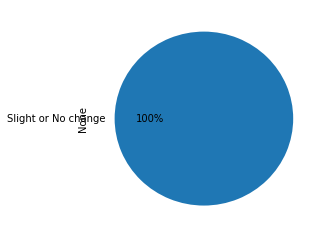

In [13]:
a.plot.pie(figsize=(4,4),autopct="%1.0f%%")
plt.show()

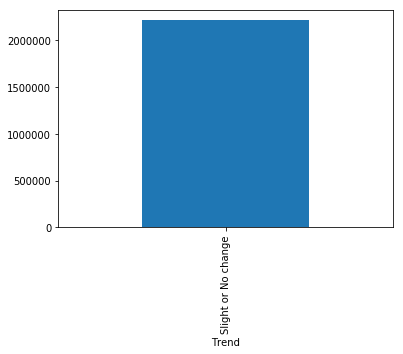

In [14]:
b = data.groupby('Trend')['Total Traded Quantity'].mean()
b.plot.bar()
plt.show()

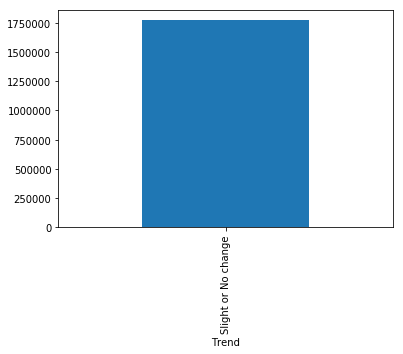

In [15]:
c = data.groupby('Trend')['Total Traded Quantity'].median()
c.plot.bar()
plt.show()

In [16]:
#plt.pie(a[1],labels=a[0],autopct="%1.0f%%")
#plt.show()

In [17]:
#plt.bar(list,data.groupby(by='Trend')['Total Traded Quantity'].mean())

In [18]:
#plt.bar(list,data.groupby(by='Trend')['Total Traded Quantity'].median())

# Query 2.5

Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

In [19]:
#data.info()

/home/abhishek/.local/lib/python2.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/abhishek/.local/lib/python2.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


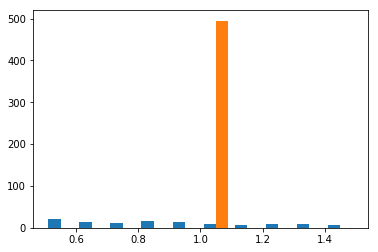

In [20]:
#c = data.groupby('Day_Perc_Change')
d = np.unique(data['Day_Perc_Change'],return_counts=True)
plt.hist(d)
plt.show()

# Query 2.6

We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification.

In [21]:
ashoka = pd.read_csv("./Small_Cap/ASHOKA.csv")
jet = pd.read_csv("./Small_Cap/JETAIRWAYS.csv")
fortis = pd.read_csv("./Small_Cap/FORTIS.csv")
raymond = pd.read_csv("./Small_Cap/RAYMOND.csv")
bajaj = pd.read_csv("./Small_Cap/BAJAJELEC.csv")
nifty = pd.read_csv("./Nifty50/Nifty50.csv")

In [22]:
# Arrange all rows by value in index Series
fortis = fortis.set_index('Series')
# Drop all the rows with IL in Series
fortis = fortis.drop('IL')

In [23]:
fortis.reset_index()

,Series,Symbol,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,EQ,FORTIS,15-May-2017,208.40,208.40,209.65,204.05,206.75,205.25,205.66,9078354,1.867055e+09,24607,5980115,65.87
1,EQ,FORTIS,16-May-2017,205.25,206.25,209.45,205.45,207.70,207.90,207.86,2146212,4.461109e+08,15071,1127662,52.54
2,EQ,FORTIS,17-May-2017,207.90,208.00,210.80,204.90,205.30,205.90,208.01,3032479,6.307854e+08,21453,1609171,53.06
3,EQ,FORTIS,18-May-2017,205.90,204.00,205.25,195.00,195.80,196.85,200.05,2852401,5.706199e+08,18709,1337328,46.88
4,EQ,FORTIS,19-May-2017,196.85,197.80,204.90,196.45,204.20,203.55,200.95,4144993,8.329173e+08,37949,1424440,34.37
5,EQ,FORTIS,22-May-2017,203.55,206.00,206.25,193.50,195.40,194.80,198.74,3379385,6.716314e+08,25848,1700659,50.32
6,EQ,FORTIS,23-May-2017,194.80,195.50,199.00,191.20,196.95,196.55,196.18,3746973,7.350809e+08,29372,2086212,55.68
7,EQ,FORTIS,24-May-2017,196.55,197.65,200.20,192.50,194.50,194.35,196.82,2471551,4.864562e+08,24620,1254518,50.76
8,EQ,FORTIS,25-May-2017,194.35,192.50,203.50,192.10,202.50,202.55,199.13,2337720,4.655025e+08,16209,666465,28.51
9,EQ,FORTIS,26-May-2017,202.55,205.10,206.25,201.75,202.75,202.75,204.18,2141143,4.371788e+08,14747,855686,39.96


In [24]:
np.unique(bajaj['Series'])

array(['EQ'], dtype=object)

In [25]:
jet.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,JETAIRWAYS,EQ,15-May-2017,519.45,520.00,533.40,517.10,527.8,527.50,526.08,1837033,9.664298e+08,25433,430754,23.45
1,JETAIRWAYS,EQ,16-May-2017,527.50,527.00,536.50,524.65,534.0,534.15,531.79,1382182,7.350363e+08,23991,284837,20.61
2,JETAIRWAYS,EQ,17-May-2017,534.15,532.00,534.75,526.20,530.0,528.90,529.75,690466,3.657742e+08,10219,53551,7.76
3,JETAIRWAYS,EQ,18-May-2017,528.90,525.15,538.60,517.50,517.7,522.70,529.55,1701102,9.008102e+08,25651,309608,18.20
4,JETAIRWAYS,EQ,19-May-2017,522.70,525.60,532.90,517.45,521.0,520.40,524.69,1272799,6.678247e+08,20409,257037,20.19


In [26]:
my_dict = {'fortis': [ix for ix in fortis['Close Price']],
           'bajaj': [ix for ix in bajaj['Close Price']],
           'ashoka': [ix for ix in ashoka['Close Price']],
           'jet': [ix for ix in jet['Close Price']],
           'raymond': [ix for ix in raymond['Close Price']],
           'nifty': [ix for ix in nifty['Close']],
          }

In [27]:
# Dataframe having all columns of close price
cp =pd.DataFrame(my_dict)

In [28]:
# percent cahnge in values
per_cp = cp.pct_change()

In [29]:
# Removing NaN values
per_cp = per_cp.dropna()

In [30]:
#plt.style.use("seaborn")
#plt.scatter(per_cp['jet'],per_cp['ashoka'])

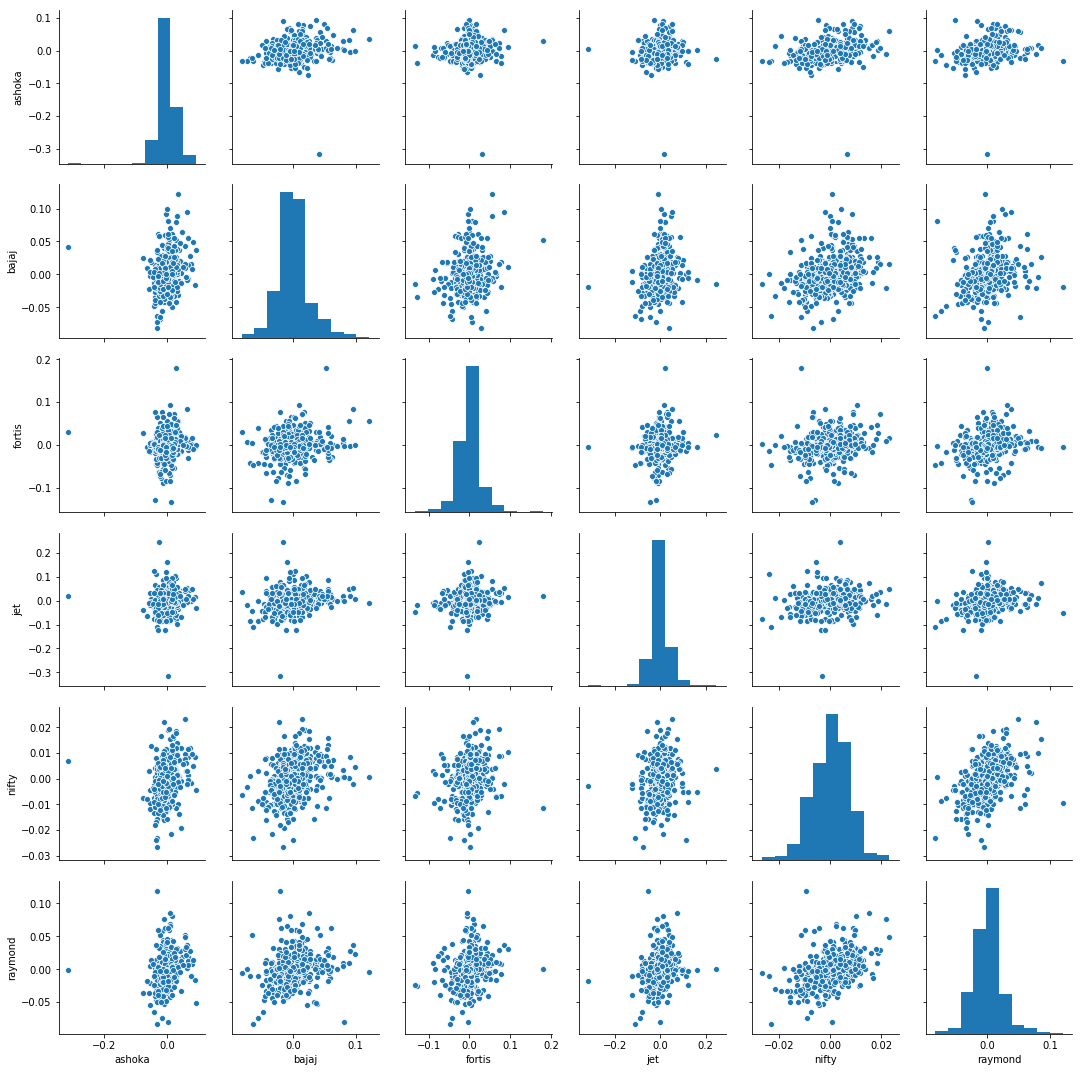

In [31]:
final_plt = sns.pairplot(per_cp)

# Query 2.7

Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read.

You have already calculated the percentage changes in several stock prices. 
Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.

Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

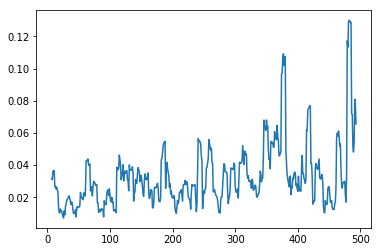

In [32]:
jet_volatility = per_cp['jet'].rolling(window=7)
jet_volatility = jet_volatility.std()
plt.plot(jet_volatility)
plt.show()

# Query 2.8

Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3) 

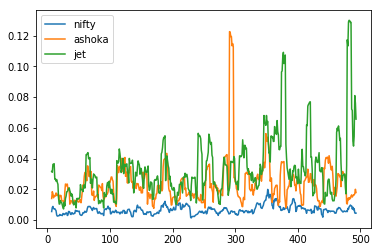

In [33]:
nifty_volatility = per_cp['nifty'].rolling(window = 7)
ashoka_volatility = per_cp['ashoka'].rolling(window = 7)
nifty_volatility= nifty_volatility.std()
ashoka_volatility = ashoka_volatility.std()
plt.plot(nifty_volatility)
plt.plot(ashoka_volatility)
plt.plot(jet_volatility)
plt.legend()
plt.show()

# Query 2.9

Trade Calls - Using Simple Moving Averages. Study about moving averages here. 
 
Plot the 21 day and 34 day Moving average with the average price and decide a Call ! 
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. 
One of the most widely used technical indicators.

In [34]:
jet_data = jet[['Date','Average Price']]
jet_data.head()

,Date,Average Price
0,15-May-2017,526.08
1,16-May-2017,531.79
2,17-May-2017,529.75
3,18-May-2017,529.55
4,19-May-2017,524.69


In [35]:
jet_data['Date'] = pd.to_datetime(jet_data['Date'])

/home/abhishek/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
jet_21 = jet_data['Average Price'].rolling(window = 21).mean()
jet_34 = jet_data['Average Price'].rolling(window = 34).mean()

In [37]:
jet_data.set_index('Date',inplace=True)

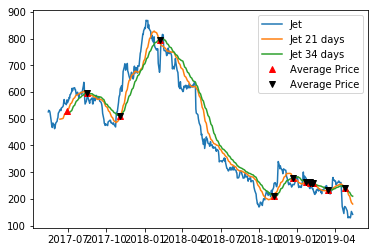

In [38]:
plt.plot(jet_data.index,jet_data['Average Price'],label = 'Jet')
plt.plot(jet_data.index,jet_21,label = 'Jet 21 days')
plt.plot(jet_data.index,jet_34,label = 'Jet 34 days')
idx = np.argwhere(np.diff((jet_21 - jet_34)> 0)).flatten()
idy = np.argwhere(np.diff((jet_21 - jet_34)< 0)).flatten()
plt.plot(jet_data.index[idx], jet_21[idx], 'ro',marker = '^')
plt.plot(jet_data.index[idy], jet_21[idy], 'ro',marker = 'v',c='Black')
plt.legend()
plt.show()

# Query 2.10

Trade Calls - Using Bollinger Bands 
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average 
The bollinger bands comprise the following data points- 
The 14 day rolling mean of the closing price (we call it the average) 
Upper band which is the rolling mean + 2 standard deviations away from the average. 
Lower band which is the rolling mean - 2 standard deviations away from the average. 
Average Daily stock price.
Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. 
Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. 
Save to a new csv file. 

In [39]:
jet_avg = jet['Close Price'].rolling(window = 14).mean()
jet_sd = jet['Close Price'].rolling(window = 14).std()

In [40]:
for ix in jet_avg:
    upper_band = jet_avg + 2 * jet_sd
    lower_band = jet_avg - 2 * jet_sd

In [42]:
jet['upper_band'] = upper_band
jet['lower_band'] = lower_band
jet['avg'] = jet_avg
jet['jet_sd'] = jet_sd

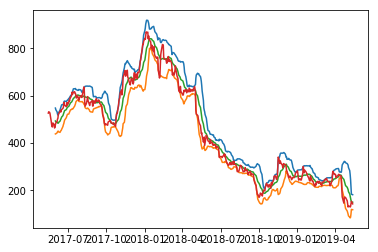

In [41]:
plt.plot(jet_data.index,upper_band)
plt.plot(jet_data.index,lower_band)
plt.plot(jet_data.index,jet_avg)
plt.plot(jet_data.index,jet_data['Average Price'])
plt.show()

In [44]:
jet.to_csv('modified_jet.csv')